# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

****
# Student work begins here: 

Start by importing pyplot for data vizualization

In [28]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

****
## Save the json data to a pandas data frame and inspect it to get an idea of columns, variable types, and missing values.

In [29]:
df = pd.read_json('data/world_bank_projects.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

****
## Inspect a few rows of the data frame to get an idea of the values in the columns

In [30]:
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


****
## Create a pandas series that lists the frequencies of each country in the Data Frame in descending order. Print out the top 10 countries.
 + This is the answer to Question 1

In [31]:
project_counts = df['countryname'].value_counts()
project_counts.head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

****
## Plot these countries to compare them visually.

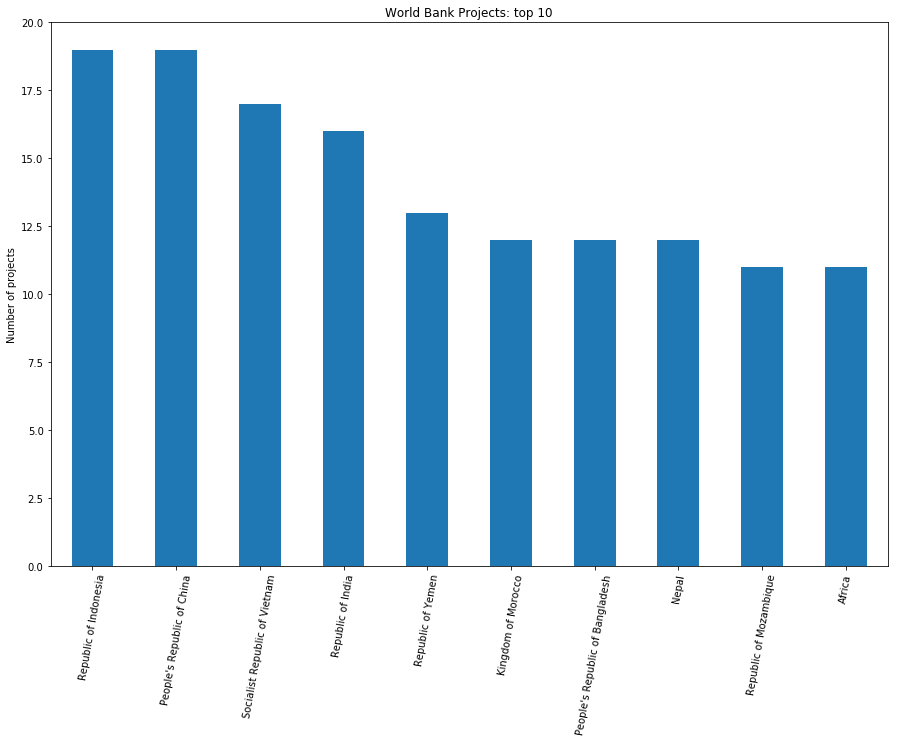

In [32]:
project_counts.head(10).plot(kind='bar')
plt.title('World Bank Projects: top 10')
plt.ylabel('Number of projects')
plt.xticks(rotation=80)
plt.ylim(0,20)
plt.show()

****
# Question 2
## Look at the first few rows of the 'mjtheme_namecode' column to understand the values.

 + It seems that each row in this column contains a list of dictionaries.
 + Each dictionary contains the code and the theme
 + Each project can have multiple themes

In [33]:
df['mjtheme_namecode'].head()

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object

****
## The first row gives an example of a code with a missing name

In [34]:
df['mjtheme_namecode'][0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

****
## Let's create a dictionary associating each code with it's corresponding theme name.
 + Stop once the dictionary has been completed to reduce execution time
 + Don't use occurences that have missing values for the name

In [35]:
name_code_dict = {'1': '', 
                  '2': '', 
                  '3': '', 
                  '4': '',
                  '5': '',
                  '6': '', 
                  '7': '',
                  '8': '',
                  '9': '',
                  '10': '',
                  '11': '',}
while '' in name_code_dict.values():
    for l in df['mjtheme_namecode']:
        for d in l:
            if d['name'] != '':
                name_code_dict[d['code']] = d['name']

In [36]:
name_code_dict

{'1': 'Economic management',
 '2': 'Public sector governance',
 '3': 'Rule of law',
 '4': 'Financial and private sector development',
 '5': 'Trade and integration',
 '6': 'Social protection and risk management',
 '7': 'Social dev/gender/inclusion',
 '8': 'Human development',
 '9': 'Urban development',
 '10': 'Rural development',
 '11': 'Environment and natural resources management'}

****
## Now, lets create two dictionaries of frequencies, one for code counts and one for theme name counts:
 + Then we will convert them to pandas series and sort the top 10 by frequency

In [37]:
master_code_counts = {}
master_name_counts = {}
for l in df['mjtheme_namecode']:
    for d in l:
        if d['code'] in master_code_counts.keys():
            master_code_counts[d['code']] += 1
        else:
            master_code_counts[d['code']] = 1
            
        if d['name'] in master_name_counts.keys():
            master_name_counts[d['name']] += 1
        else:
            master_name_counts[d['name']] = 1

In [38]:
master_code_counts

{'8': 210,
 '11': 250,
 '1': 38,
 '6': 168,
 '5': 77,
 '2': 199,
 '7': 130,
 '4': 146,
 '10': 216,
 '9': 50,
 '3': 15}

In [39]:
code_counts = pd.Series(master_code_counts).sort_values(ascending=False).head(10)
code_counts

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
dtype: int64

In [40]:
master_name_counts

{'Human development': 197,
 '': 122,
 'Economic management': 33,
 'Social protection and risk management': 158,
 'Trade and integration': 72,
 'Public sector governance': 184,
 'Environment and natural resources management': 223,
 'Social dev/gender/inclusion': 119,
 'Financial and private sector development': 130,
 'Rural development': 202,
 'Urban development': 47,
 'Rule of law': 12}

****
## These are the top 10 major project themes, before missing values are replaced.
 + This is the answer to question 2

In [41]:
name_counts = pd.Series(master_name_counts).sort_values(ascending=False).head(10)
name_counts

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
dtype: int64

****
# Question 3
## We can see that the code counts do not match the name counts. This is because there are 122 occurences where the theme name is missing. Using our name_code_dict dictionary, let's fill in the missing names.

In [42]:
for l in df['mjtheme_namecode']:
    for d in l:
        if d['name'] == '':
            d['name'] = name_code_dict[d['code']]

****
## We can now reassign the name counts dictionary and see that the values match the code counts, as all missing values have been filled in. We can also check the first row, just to confirm that the missing value was filled in.
 + We could use nested list comprehension here, but because the data set is small, for loops are sufficiently fast while retaining readability.

In [43]:
master_name_counts = {}
for l in df['mjtheme_namecode']:
    for d in l:
        if d['name'] in master_name_counts.keys():
            master_name_counts[d['name']] += 1
        else:
            master_name_counts[d['name']] = 1

In [44]:
master_name_counts

{'Human development': 210,
 'Environment and natural resources management': 250,
 'Economic management': 38,
 'Social protection and risk management': 168,
 'Trade and integration': 77,
 'Public sector governance': 199,
 'Social dev/gender/inclusion': 130,
 'Financial and private sector development': 146,
 'Rural development': 216,
 'Urban development': 50,
 'Rule of law': 15}

In [45]:
name_counts = pd.Series(master_name_counts).sort_values(ascending=False).head(10)
name_counts

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
dtype: int64

In [46]:
code_counts

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
dtype: int64

In [47]:
df['mjtheme_namecode'][0]

[{'code': '8', 'name': 'Human development'},
 {'code': '11', 'name': 'Environment and natural resources management'}]

****
## Let's visualize the top 10 themes for World Bank projects

Text(0, 0.5, 'Number of projects')

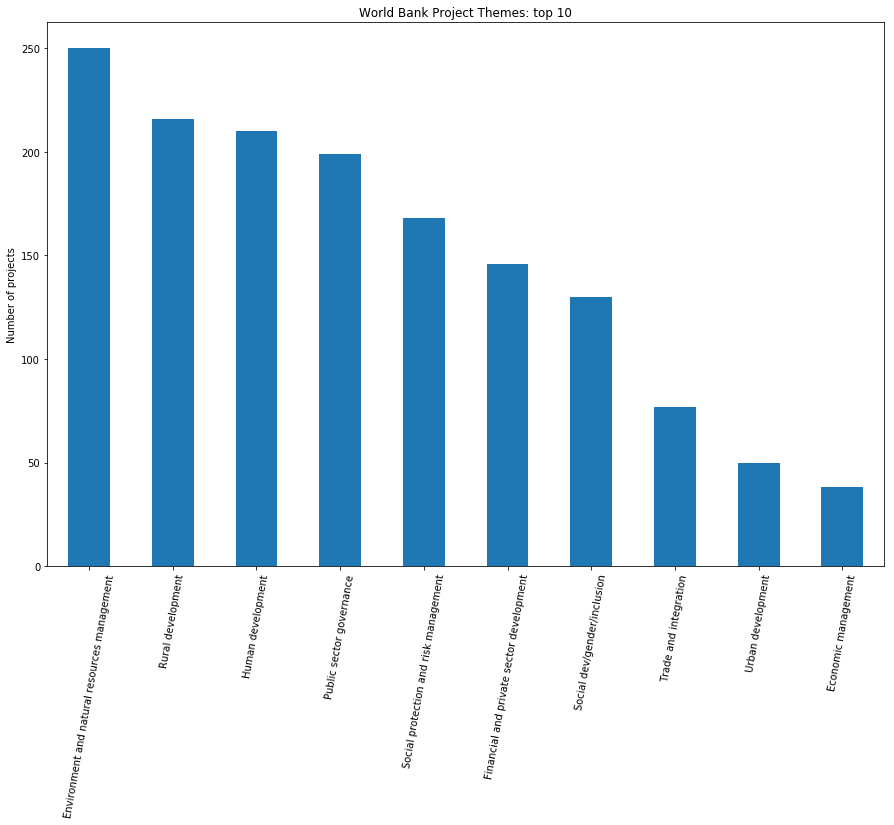

In [58]:
name_counts.plot(kind='bar')
plt.xticks(rotation=80)
plt.title('World Bank Project Themes: top 10')
plt.ylabel('Number of projects')